# Prediction Maps

### Uploading files - unbalanced 2017-2019 test set / predictions vector / lon,lat, cubes in map format (lon,lat,time)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import pandas as pd
import os 

%matplotlib inline

In [15]:
mfdataDIRa = '/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Prediction_Maps/cubes_NP.nc'
DS = xr.open_mfdataset(mfdataDIRa)
lon = DS.lon
lat = DS.lat

In [16]:
mfdataDIRb = '/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Prediction_Maps/pred_map.nc'
pm_19_7lag = xr.open_mfdataset(mfdataDIRb)

In [17]:
mfdataDIRc = '/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Prediction_Maps/pred_map_131019_270.nc'
pm_19_270lag = xr.open_mfdataset(mfdataDIRc)

In [18]:
mfdataDIRd = '/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Prediction_Maps/pred_map_131019_560.nc'
pm_19_560lag = xr.open_mfdataset(mfdataDIRd)

In [19]:
mfdataDIRe = '/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Prediction_Maps/pred_map_131017.nc'
pm_17_7lag = xr.open_mfdataset(mfdataDIRe)

In [27]:
file='/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Prediction_Maps/lags.csv'
lags = pd.read_csv(file, header=None) #names=colnames,
lags.columns = [lags]
print(lags)

      0       1       2
0     2  0.6597  0.6672
1     7  0.6441  0.6394
2    14  0.6343  0.6161
3    30  0.6328  0.5959
4    50  0.6364  0.5806
5    70  0.6381  0.5514
6   100  0.6410  0.5191
7   140  0.6406  0.5186
8   170  0.6495  0.5221
9   200  0.6476  0.5271
10  230  0.6608  0.5136
11  270  0.6610  0.4710
12  310  0.6521  0.4468
13  365  0.5832  0.3890
14  450  0.6541  0.4390
15  560  0.6642  0.4758
16  730  0.5994  0.3869


In [21]:
lon_min=min(lon)
lon_max=max(lon)
lat_min=min(lat)
lat_max=max(lat)
X,Y = np.meshgrid(lon,lat)

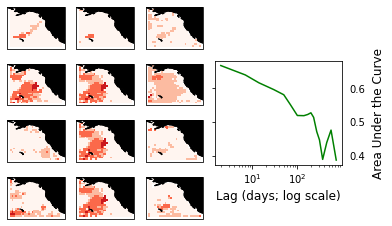

In [64]:
import cartopy
import cartopy.feature as cft
import cartopy.crs as ccrs
import cmocean as cm

cubes_7lag_1 = DS.cubes.isel(time=13063)
cubes_7lag_2 = DS.cubes.isel(time=13070)
cubes_7lag_3 = DS.cubes.isel(time=13793)
cubes_7lag_4 = DS.cubes.isel(time=13799)
cubes_270lag = DS.cubes.isel(time=13530)
cubes_560lag = DS.cubes.isel(time=13240)
lon = DS.lon
lat = DS.lat
lons = np.array(DS.lon)
lats =np.array(DS.lat)
lon_min=min(lon)
color='Reds'

ax1 = plt.subplot2grid((4, 5), (0, 0), colspan=1, projection=ccrs.PlateCarree()) 
plt.pcolormesh(X, Y, cubes_7lag_1, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax1.coastlines(color = 'black', zorder=10)
ax1.add_feature(cft.LAND, zorder=9, facecolor='k')

ax2 = plt.subplot2grid((4, 5), (0, 1), colspan=1 , projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_2, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax2.coastlines(color = 'black', zorder=10)
ax2.add_feature(cft.LAND, zorder=9, facecolor='k')

ax3 = plt.subplot2grid((4, 5), (0, 2), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_17_7lag.pred_map_131017, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax3.coastlines(color = 'black', zorder=10)
ax3.add_feature(cft.LAND,zorder=9, facecolor='k')

ax4 = plt.subplot2grid((4, 5), (1, 0), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_3, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax4.coastlines(color = 'black', zorder=10)
ax4.add_feature(cft.LAND, zorder=9, facecolor='k')

ax5 = plt.subplot2grid((4, 5), (1, 1), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_4, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax5.coastlines(color = 'black', zorder=10)
ax5.add_feature(cft.LAND, zorder=9, facecolor='k')

ax6 = plt.subplot2grid((4, 5), (1, 2), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_19_7lag.pred_map, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax6.coastlines(color = 'black', zorder=10)
ax6.add_feature(cft.LAND, zorder=9, facecolor='k')

ax7 = plt.subplot2grid((4, 5), (2, 0), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_270lag, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax7.coastlines(color = 'black', zorder=10)
ax7.add_feature(cft.LAND, zorder=9, facecolor='k')

ax8 = plt.subplot2grid((4, 5), (2, 1), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_4,  transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax8.coastlines(color = 'black', zorder=10)
ax8.add_feature(cft.LAND, zorder=9, facecolor='k')

ax9 = plt.subplot2grid((4, 5), (2, 2), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_19_270lag.pred_map_131019_270, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax9.coastlines(color = 'black', zorder=10)
ax9.add_feature(cft.LAND, zorder=9, facecolor='k')

#13240
ax10 = plt.subplot2grid((4, 5), (3, 0), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_560lag , transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax10.coastlines(color = 'black', zorder=10)
ax10.add_feature(cft.LAND, zorder=9, facecolor='k')

ax11 = plt.subplot2grid((4, 5), (3, 1), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_4, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
ax11.coastlines(color = 'black', zorder=10)
ax11.add_feature(cft.LAND, zorder=9, facecolor='k')
plt.clim(0, 4)

ax12 = plt.subplot2grid((4, 5), (3, 2), colspan=1, projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_19_560lag.pred_map_131019_560, transform=ccrs.PlateCarree(), cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax12.coastlines(color = 'black', zorder=10)
ax12.add_feature(cft.LAND, zorder=9, facecolor='k')

ax = plt.subplot2grid((4, 5), (1, 3), rowspan=2, colspan=2)
ax.plot(lags[0],lags[2],'-g')
plt.xscale('log')
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.ylabel('Area Under the Curve', labelpad=-170, fontsize=12)
plt.xlabel('Lag (days; log scale)', fontsize=12)

plt.savefig('/Users/katerinagiamalaki/Desktop/rf_mhw_local/Figure_2_maps.jpg', dpi=600)

plt.show()

In [23]:
mfdata1= '/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Prediction_Maps/pred_map_131019_fin.nc'
pm_19_fin = xr.open_mfdataset(mfdata1)
pm_19_fin

<xarray.Dataset>
Dimensions:          (lat: 21, lon: 29)
Coordinates:
  * lon              (lon) float64 187.5 190.0 192.5 195.0 ... 252.5 255.0 257.5
  * lat              (lat) float64 12.5 15.0 17.5 20.0 ... 55.0 57.5 60.0 62.5
Data variables:
    pred_map_131019  (lat, lon) float64 dask.array<chunksize=(21, 29), meta=np.ndarray>

In [24]:
mfdata2 = '/Users/katerinagiamalaki/Desktop/Random_Forest_for_MHW/Prediction_Maps/pred_map_131017_fin.nc'
pm_17_fin = xr.open_mfdataset(mfdata2)
pm_17_fin

<xarray.Dataset>
Dimensions:          (lat: 21, lon: 29)
Coordinates:
  * lon              (lon) float64 187.5 190.0 192.5 195.0 ... 252.5 255.0 257.5
  * lat              (lat) float64 12.5 15.0 17.5 20.0 ... 55.0 57.5 60.0 62.5
Data variables:
    pred_map_131017  (lat, lon) float64 dask.array<chunksize=(21, 29), meta=np.ndarray>

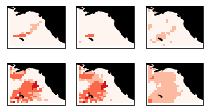

In [62]:
cubes_7lag_1 = DS.cubes.isel(time=13063)
cubes_7lag_2 = DS.cubes.isel(time=13070)
cubes_7lag_3 = DS.cubes.isel(time=13793)
cubes_7lag_4 = DS.cubes.isel(time=13799)
cubes_270lag = DS.cubes.isel(time=13530)
cubes_560lag = DS.cubes.isel(time=13240)
lon = DS.lon
lat = DS.lat
lons = np.array(DS.lon)
lats =np.array(DS.lat)
lon_min=min(lon)
color='Reds'

ax1 = plt.subplot2grid((4, 5), (0, 0), colspan=1, projection=ccrs.PlateCarree()) 
plt.pcolormesh(X, Y, cubes_7lag_1,transform=ccrs.PlateCarree(), cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax1.coastlines(color = 'black', zorder=9)
ax1.add_feature(cft.LAND, facecolor='k',zorder=10)

ax2 = plt.subplot2grid((4, 5), (0, 1), colspan=1 , projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_2, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax2.coastlines(color = 'black', zorder=9)
ax2.add_feature(cft.LAND, facecolor='k',zorder=10)

ax3 = plt.subplot2grid((4, 5), (0, 2), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_17_fin.pred_map_131017, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax3.coastlines(color = 'black', zorder=9)
ax3.add_feature(cft.LAND, facecolor='k',zorder=10)

ax4 = plt.subplot2grid((4, 5), (1, 0), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_3, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax4.coastlines(color = 'black', zorder=9)
ax4.add_feature(cft.LAND, facecolor='k',zorder=10)

ax5 = plt.subplot2grid((4, 5), (1, 1), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, cubes_7lag_4, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax5.coastlines(color = 'black', zorder=9)
ax5.add_feature(cft.LAND, facecolor='k',zorder=10)

ax6 = plt.subplot2grid((4, 5), (1, 2), colspan=1,  projection=ccrs.PlateCarree())
plt.pcolormesh(X, Y, pm_19_fin.pred_map_131019, transform=ccrs.PlateCarree(),cmap=plt.cm.get_cmap(color))
plt.clim(0, 4)
ax6.coastlines(color = 'black', zorder=9)
ax6.add_feature(cft.LAND, facecolor='k')

plt.savefig('/Users/katerinagiamalaki/Desktop/rf_mhw_local/Figure_3.jpg', dpi=600)
